### Description

- **|Column name|**	  --   |Description|
- **dateCrawled**			Date the car was crawled. (Date)
- **name**	       			Name of the car. (String)
- **seller**	Type of seller (private or dealer). (String)
- **offerType**	Type of offer (e.g. sale, repair, etc.). (String)
- **price**	Price of the car. (Integer)
- **abtest**	Test type (A or B). (String)
- **vehicleType**	Type of vehicle (e.g. SUV, sedan, etc.). (String)
- **yearOfRegistration**	Year the car was registered. (Integer)
- **gearbox**	Type of gearbox (manual or automatic). (String)
- **powerPS**	Horse Power of the car in PS. (Integer)
- **model**	Model of the car. (String)
- **kilometer**	Kilometers the car has been driven. (Integer)
- **monthOfRegistration**	Month the car was registered. (Integer)
- **fuelType**	Type of fuel (e.g. diesel, petrol, etc.). (String)
- **brand**	Brand of the car. (String)
- **notRepairedDamage**	Whether or not the car has any damage that has not been repaired. (String)
- **dateCreated**	Date the car was up for sale. (Date)
- **nrOfPictures**	Number of pictures of the car. (Integer)
- **postalCode**	Postal code of the owner. (Integer)
- **lastSeen**	last seen of the owner. (Date)

#### Libraries

In [1]:
import pandas as pd
import numpy as np

# Pandas Profiling for data overview report
import ydata_profiling

# Visualization Packages

from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
from plotly.offline import init_notebook_mode,iplot
from plotnine import *
from plotnine.facets import facet_wrap
from PIL import Image

# Encoder
import category_encoders as ce

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

*Load Dataset*

In [2]:
df = pd.read_csv("autos.csv")
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.shape

(371528, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [5]:
df.duplicated().sum()

0

### Descriptive Data Analysis

In [6]:
df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [7]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Column: index
index
0         1
247692    1
247690    1
247689    1
247688    1
         ..
123841    1
123840    1
123839    1
123838    1
371527    1
Name: count, Length: 371528, dtype: int64
------------------------------
Column: dateCrawled
dateCrawled
2016-03-24 14:49:47    7
2016-03-19 21:49:56    6
2016-03-26 22:57:31    6
2016-03-22 10:42:10    5
2016-04-01 16:52:05    5
                      ..
2016-03-20 15:56:21    1
2016-03-14 03:22:32    1
2016-03-14 22:52:34    1
2016-03-31 23:53:26    1
2016-03-07 19:39:19    1
Name: count, Length: 280500, dtype: int64
------------------------------
Column: name
name
Ford_Fiesta                                              657
BMW_318i                                                 627
Opel_Corsa                                               622
Volkswagen_Golf_1.4                                      603
BMW_316i                                                 523
                                                        ... 
Audi_A4_Ava

**German to English**:
- manuell --> Manual
- automatik --> Automatic
- ja --> Yes
- nein --> No
- benzin --> Petrol
- andere --> Other
- powerPS --> Used for horsepower in Germany

**Pandas Profiling**

In [8]:
# ydata_profiling.ProfileReport(df)

#### Inference
**Missing Values** :

- *vehicleType* has 37869 (10.2%) missing values
- *gearbox* has 20209 (5.4%) missing values
- *model* has 20484 (5.5%) missing values
- *fuelType* has 33386 (9.0%) missing values
- *notRepairedDamage* has 72060 (19.4%) missing values

**DateTime**
- Convert *dateCrawled,dateCreated,lastSeen* from object to DateTime datatype. 

**Zeros**

- *price* has 10778 (2.9%) zeros
- *powerPS* has 40820 (11.0%) zeros
- *monthOfRegistration* has 37675 (10.1%) zeros

**Irrelevant cols** :
- *index* column is not valueable.
- *dateCrawled* & *dateCreated* have same dates and both column signify time the car was up for sale.
- *seller , offerType & nrOfPictures* have more than 99% of a single category. These columns are basically useless.
- *LastSeen* column tells owners last seen on the post.
- *postalcode* signifies owners address.

**Bad data**
- *yearOfRegistration* column have some incorrect data.

### Data Preprocessing & Cleaning

**Missing Values**

In [9]:
missing_cols = ['gearbox','fuelType','notRepairedDamage']

def impute_mode(df,cols):
    for i in cols:
        df[i].fillna(df[i].value_counts().index[0], inplace =True)

impute_mode(df,missing_cols)

In [10]:
df.dropna(subset=['vehicleType', 'model'],inplace=True)

In [11]:
df.shape

(320092, 21)

Could Not impute mode for these two columns as there's no category in these columns which is extreme compared to others. Filling Nulls with mode would not be the best idea.

**DateTime**

In [12]:
# date_cols= ['dateCrawled','dateCreated','lastSeen']
# def to_date(df,cols):
#     for i in cols:
#         df[i]= pd.to_datetime(df[i])
# to_date(df,date_cols)

**Zeros**

Imputing price & PowerPS with column mean and decided to change 0 to 1 in monthOfRegistration 

In [13]:
def impute_mean(df,cols):
    for i in cols:
        col_mean = int(df[i].mean())
        df[i]= [col_mean if x==0 else x for x in df[i]]
zero_cols= ['price','powerPS']
impute_mean(df,zero_cols)

In [14]:
# replace with 1st month in place of zeros.

df['monthOfRegistration'].replace(0,1,inplace=True)

### Exploratory Data Analysis

#### What is the Rate of Registration over the Years?

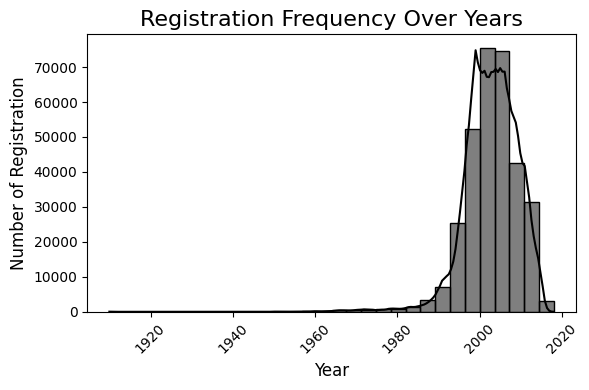

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df['yearOfRegistration'], bins=30, kde=True, color='black')
plt.title('Registration Frequency Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Registration', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Maximum registration in the data has been done between 1980 - 2016

#### What is the distribution of Registration over the Months?

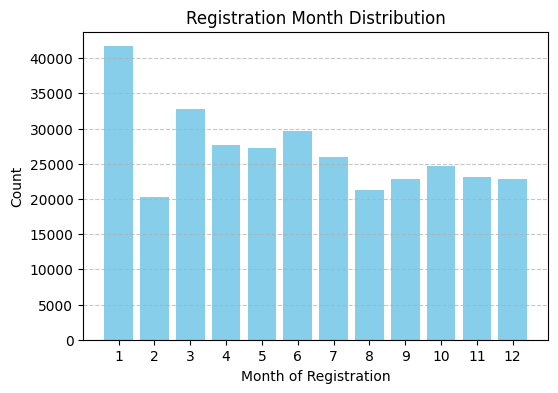

In [16]:
registration_month = df['monthOfRegistration'].value_counts().reset_index()

plt.figure(figsize=(6,4))
plt.bar(registration_month['monthOfRegistration'], registration_month['count'], color='skyblue')
plt.xlabel('Month of Registration')
plt.ylabel('Count')
plt.title('Registration Month Distribution')
plt.xticks(registration_month['monthOfRegistration'])  # Set x-ticks to be the months
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Almost Equally distributed keeping in mind we replaced missing months by 1

#### What type of fuel used in cars?

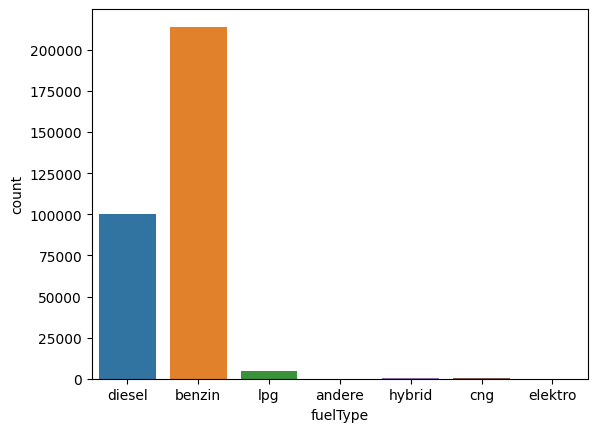

In [17]:
sns.countplot(x='fuelType', data=df)
plt.show()

Petrol and diesel type cars dominate the dataset

#### Which Car Brand Dominate the Dataset?

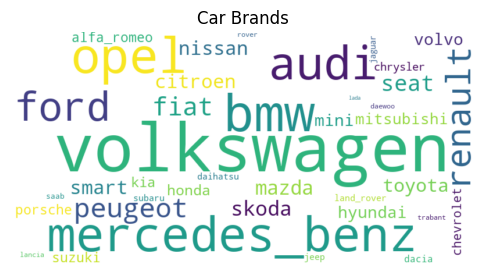

In [18]:
car_brand=df['brand'].value_counts().reset_index()
car_brand.columns = ['Brand', 'Count']

car_brand_dict = dict(zip(car_brand['Brand'], car_brand['Count']))

#  word cloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(car_brand_dict)

plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Car Brands')
plt.show()

BMW, Volkswagen, Ford, Mercedes, Audi & Opel are some most famous brands. 

#### How are the prices distributed?

In [19]:
# Capping dataset as it containg huge outliers

df=df[(df['price']>=100)&(df['price']<=30000)]

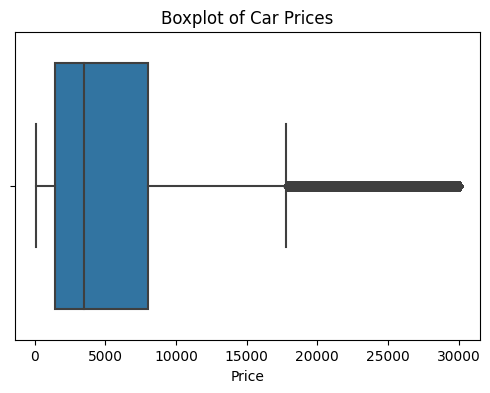

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Boxplot of Car Prices')
plt.show()

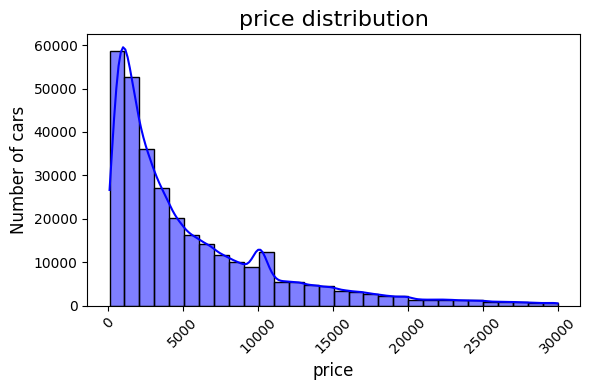

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('price distribution', fontsize=16)
plt.xlabel('price', fontsize=12)
plt.ylabel('Number of cars', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Outliers in the column but looks genuine. Might need some transformation.

#### How do the counts of different vehicle types compare to each other?

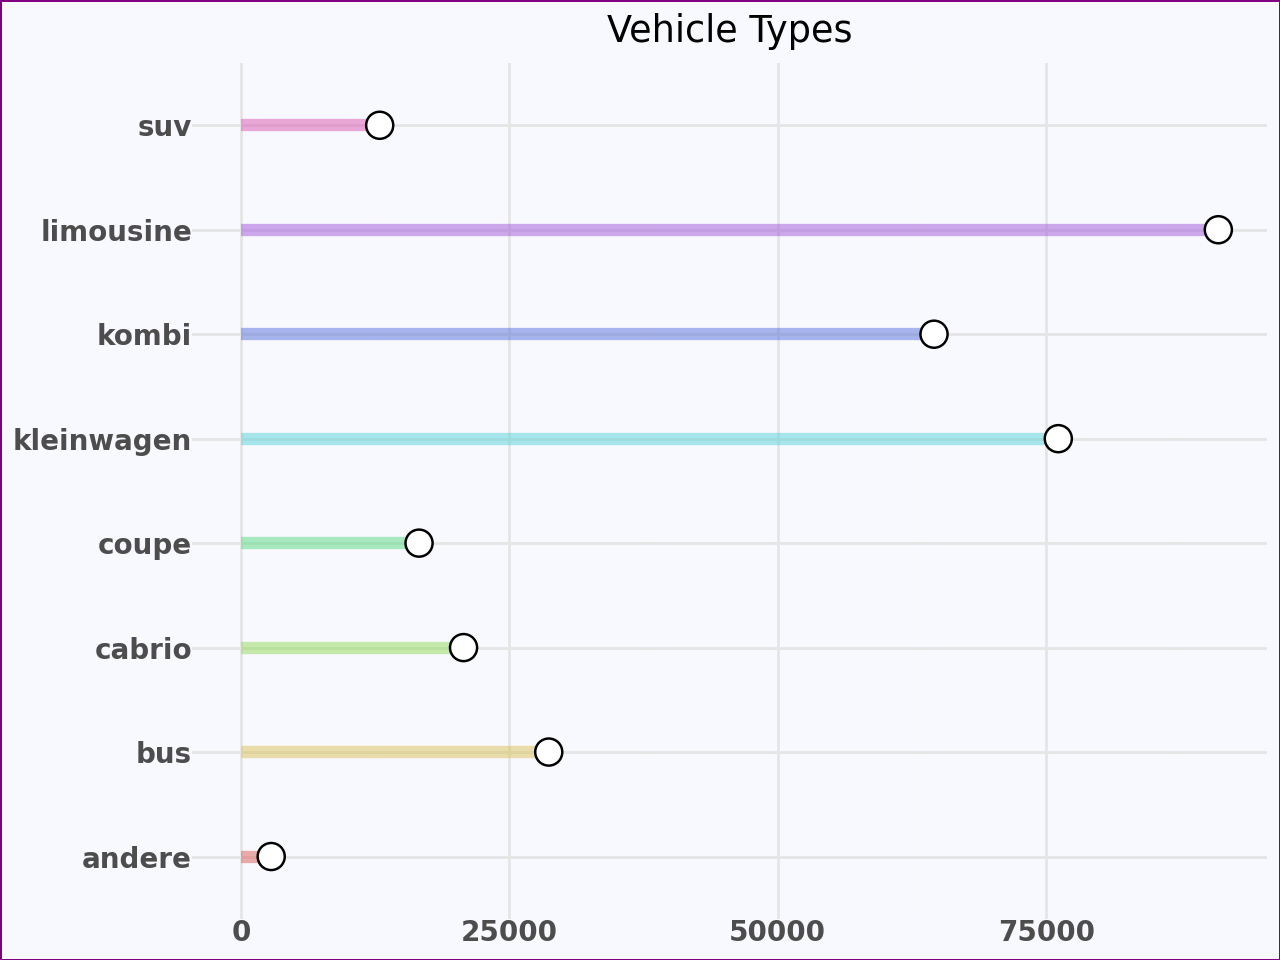

In [22]:
vehicle_types= df['vehicleType'].value_counts().reset_index()
vehicle_types.columns = ['Vehicle Type', 'Count']

# plot using Plotnine
p = (
    ggplot(vehicle_types, aes(x='Vehicle Type', y='Count', fill='Vehicle Type')) +
    geom_segment(aes(xend='Vehicle Type', yend=0, color='Vehicle Type'), size=2.5, alpha=0.5) +
    geom_point(size=5, shape='o', fill='white') + 
    coord_flip() +
    theme_minimal() +
    theme(
        plot_background=element_rect(fill="#F8F8FF", color="purple"),
        axis_title_x=element_text(size=10, hjust=0.5, face="italic"),
        axis_title_y=element_text(size=16, hjust=0.5, face="italic"),
        axis_text_x=element_text(size=10, face="bold"),
        axis_text_y=element_text(size=10, face="bold"),
        legend_position="none"
    ) +
    labs(x='', y='', title='Vehicle Types')
)

combined_plot = (
    p + facet_wrap( ncol=2)
)

print(combined_plot)

Limo is the most common car type, Least is andere

#### Is there a significant difference in the distribution in Gearbox?

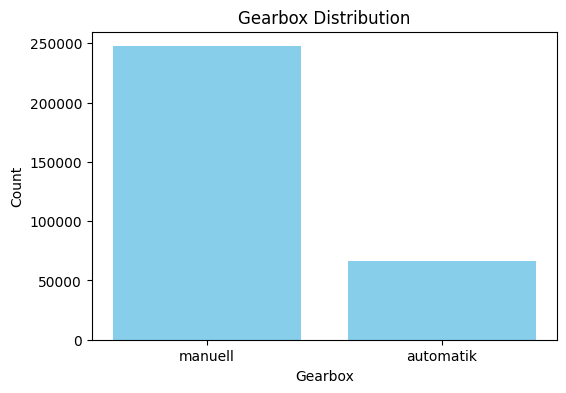

In [23]:
gearbox_counts = df['gearbox'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(gearbox_counts.index, gearbox_counts.values, color='skyblue')
plt.title('Gearbox Distribution')
plt.xlabel('Gearbox')
plt.ylabel('Count')
plt.show()

- Manual cars are more favoured.

####  What is the distribution of horsepower across all the cars?

In [24]:
df['powerPS'].describe()

count    313460.000000
mean        127.155650
std         177.596148
min           1.000000
25%          86.000000
50%         120.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

*Old cars have engines below 50 HP and some of the most powerful cars in the world have a HP in range 1000-2000. maximum can still go up but in our used cars dataset this is most likely bad data.*   Here PS~ 0.98* HP 

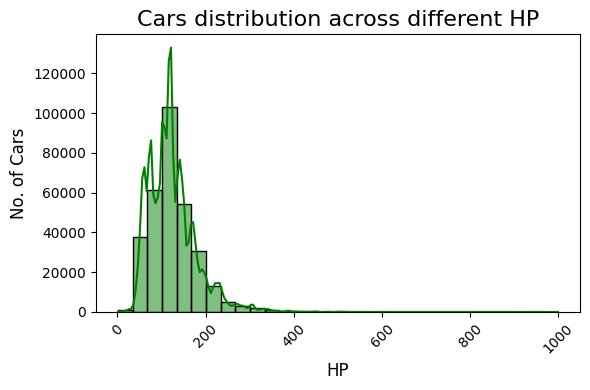

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['powerPS'] < 1000]['powerPS'], bins=30, kde=True, color='green')
plt.title('Cars distribution across different HP', fontsize=16)
plt.xlabel('HP', fontsize=12)
plt.ylabel('No. of Cars', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

maximum cars have HP about 100-250

#### What are the Most famous Car Models?

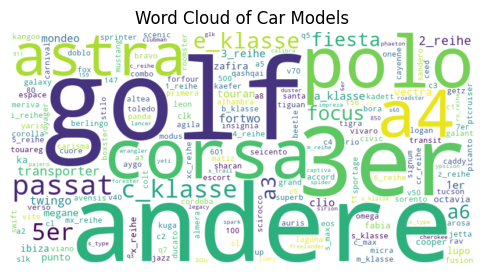

In [26]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df['model'].value_counts())

# Display the word cloud
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Car Models')
plt.show()

#### How much kilometers these cars are Driven already?

In [27]:
df['kilometer'].value_counts().head()

kilometer
150000    203634
125000     33455
100000     13620
90000      11064
80000       9753
Name: count, dtype: int64

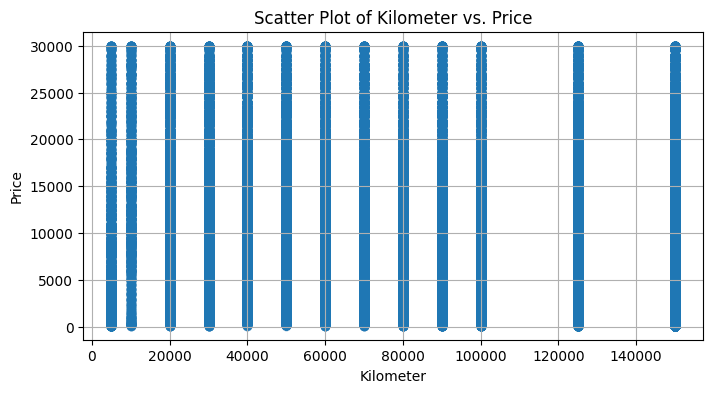

In [28]:
plt.figure(figsize=(8,4))
plt.scatter(df['kilometer'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Kilometer vs. Price')
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Most of the cars are driven more than 150000 kms & No clear relation b/w price and Kms.

#### How does the percentage of unrepaired cars compare to repaired cars in the dataset?

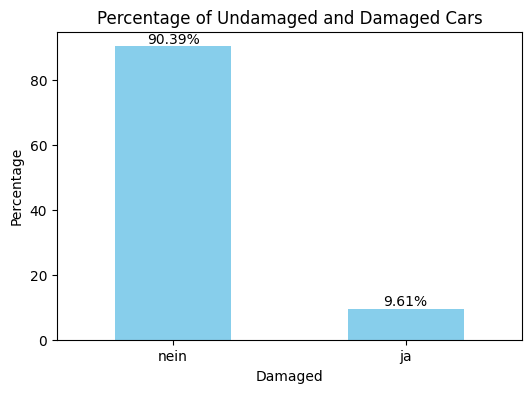

In [29]:
damaged_cars = df['notRepairedDamage'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
damaged_cars.plot(kind='bar', color='skyblue')
plt.xlabel('Damaged')
plt.ylabel('Percentage')
plt.title('Percentage of Undamaged and Damaged Cars')
plt.xticks(rotation=0)
for index, value in enumerate(damaged_cars):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')
plt.show()

almost 10% cars are damaged

### Feature Engineering

In [30]:
# Defining a range for year of Registration and HorsePower(PowerPS)
df = df[df['yearOfRegistration'].between(1980, 2020) & (df['powerPS'].between(50,400))]

In [31]:
current_year = 2023
# creating new column age of the car.
df['age'] = current_year - df['yearOfRegistration'] 

**Log Transformation**

powerPS & price column are right skewed. Applying Log transformation to mitigate skewness to make the distribution more symmetrical, which can be beneficial for linear models.

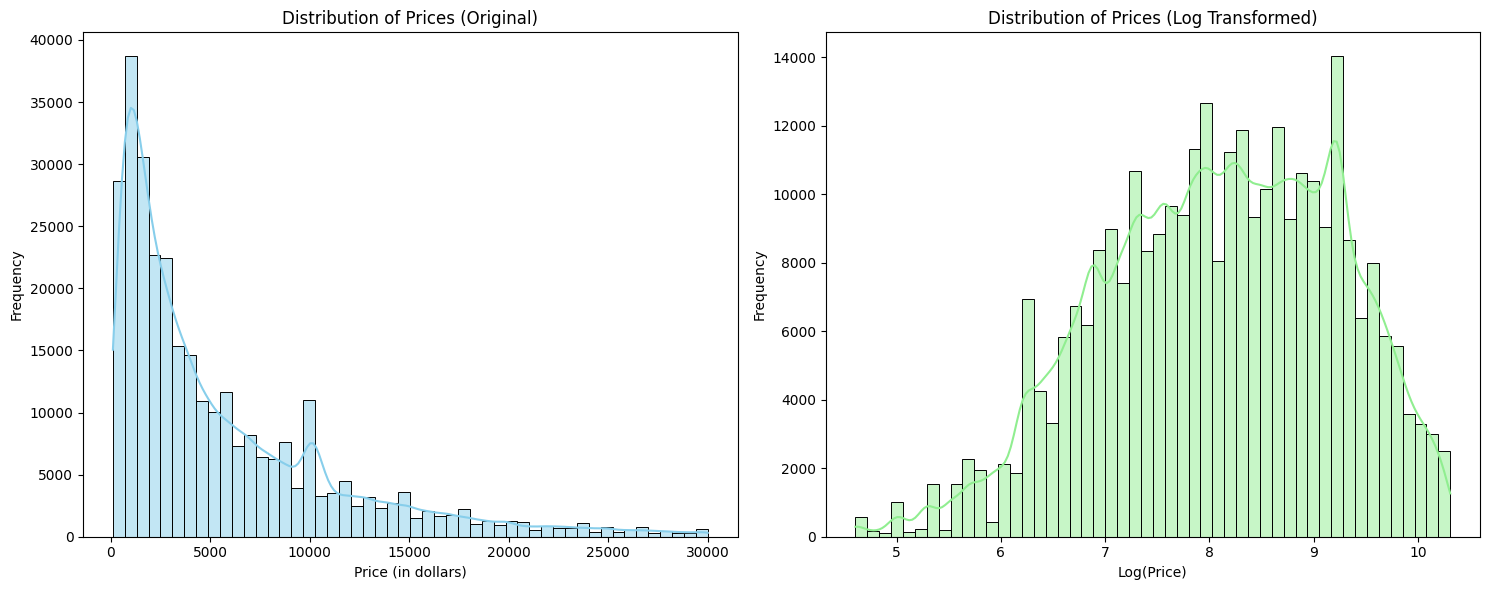

In [32]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in dollars)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [33]:
df['powerPS']=df['powerPS'].apply(np.log)
df['price']=df['price'].apply(np.log)

**Irrelevant cols**

These columns do not significantly contribute to the price of used cars.

In [34]:
df.drop(columns=['index',"nrOfPictures", "lastSeen", "dateCrawled",'name',
                "dateCreated", "postalCode", "seller", "offerType"],inplace=True)

In [35]:
df.shape

(305798, 13)

**Encoding Categorical Features**

In [36]:
# initializing target encoder
target_encoder = ce.TargetEncoder()   

columns_to_encode = ['vehicleType', 'model', 'fuelType', 'brand']
df_encoded = df.copy()  

# Encode using Target Encoder
df_encoded[columns_to_encode] = target_encoder.fit_transform(df[columns_to_encode], df['price'])

# Initialize ordinal encoder 
label_encoder = ce.OrdinalEncoder()

# Encode using label encoding
columns_to_label_encode = ['abtest','gearbox', 'notRepairedDamage']
df_encoded[columns_to_label_encode] = label_encoder.fit_transform(df[columns_to_label_encode])

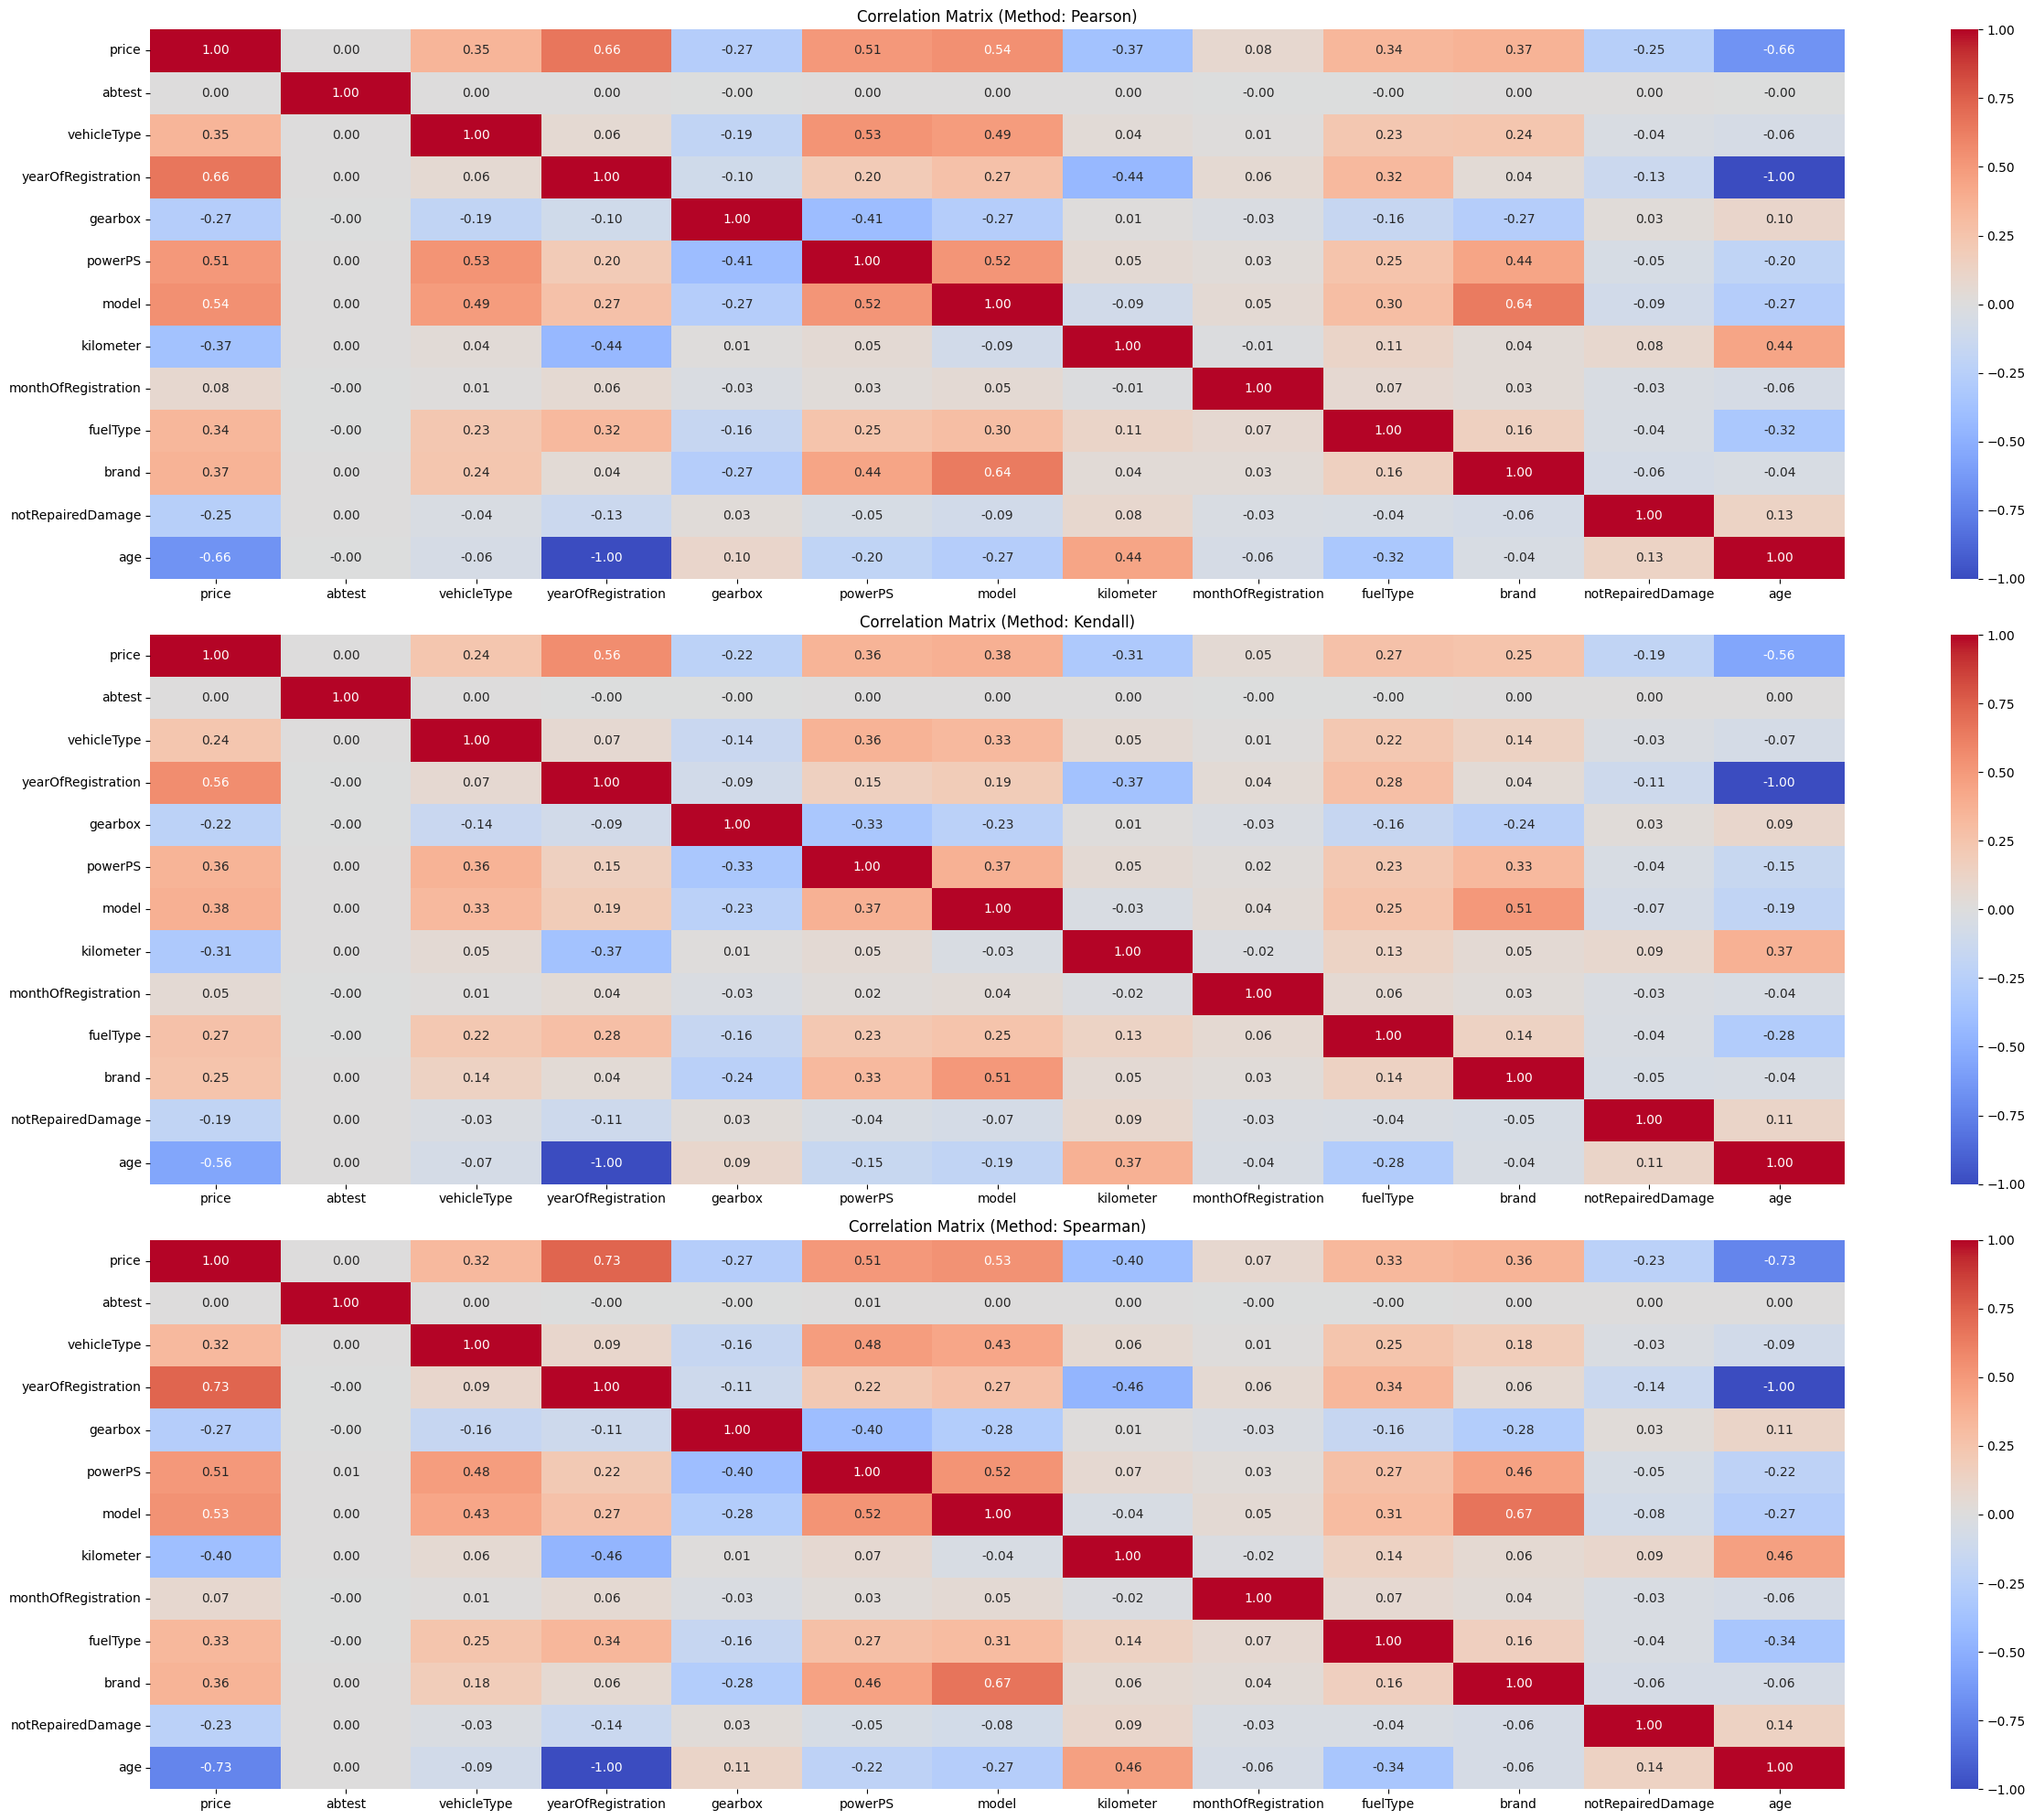

In [37]:
# correlation matrix using different methods
correlation_methods = ['pearson', 'kendall', 'spearman']

plt.figure(figsize=(25, 20))

for i, method in enumerate(correlation_methods, 1):
    plt.subplot(3, 1, i)
    sns.heatmap(df_encoded.corr(method=method), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix (Method: {method.capitalize()})')

plt.tight_layout()
plt.show()

- Price is Most correlated with inverse of age of car, powerPS,model. 
- No correlation with abtest

In [38]:
df_encoded.drop(columns=['abtest','yearOfRegistration','monthOfRegistration'],axis=1,inplace=True)

In [39]:
# Save df to pickle file
df_encoded.to_pickle('encoded_data.pkl')